In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import ploty.pyplot as py
py.init_notebook_mode(connect=True)
import ploty.graph_objs as go
%matplotlib in line


ModuleNotFoundError: No module named 'ploty'

In [12]:
data=pd.read_csv('googleplaystore.csv')
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
data.shape

(10841, 13)

In [14]:
data.isnull().count()

App               10841
Category          10841
Rating            10841
Reviews           10841
Size              10841
Installs          10841
Type              10841
Price             10841
Content Rating    10841
Genres            10841
Last Updated      10841
Current Ver       10841
Android Ver       10841
dtype: int64

In [17]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(13)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [18]:
data.dropna(how='any',inplace=True)

In [19]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(13)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


In [20]:
data.shape

(9360, 13)

In [21]:
#finding
#After remove missing data our data contain 9360 records with 13 fields


In [22]:
#Rating
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Rating')

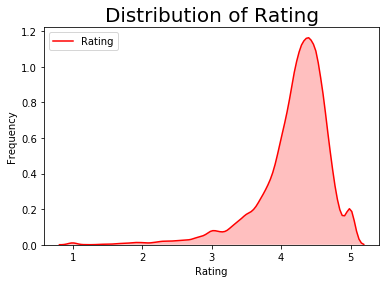

In [23]:
#rating distibution
g=sns.kdeplot(data.Rating,color='red',shade=True)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')
plt.title('Distribution of Rating',size=20)

In [24]:
data.Rating.mean()

4.191837606837612

In [25]:
print(len(data['Category'].unique()),"categories")
print('\n',data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5,1,'Count of app in each category')

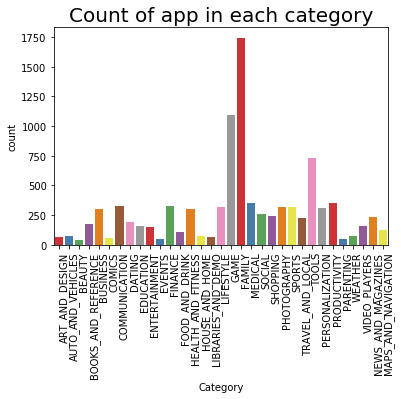

In [26]:
g=sns.countplot(x='Category',data=data,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='left')
g
plt.title('Count of app in each category',size=20)
#game and family category are the most appearances for application in store


Text(0.5,1,'Boxolot od Rating VS Category,size=20')

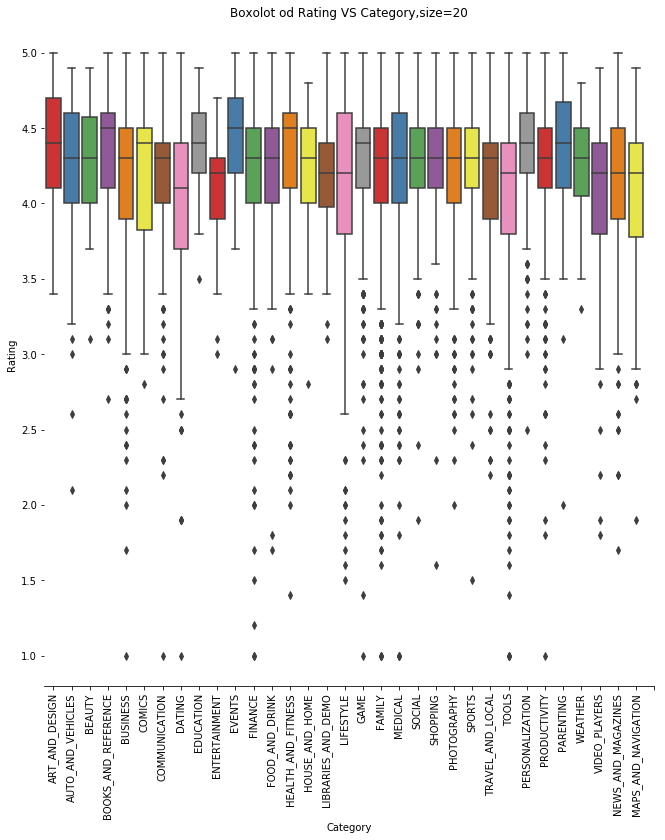

In [27]:
g=sns.catplot(x='Category',y='Rating',data=data,kind='box',height=10,palette='Set1')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g=g.set_ylabels("Rating")
plt.title('Boxolot od Rating VS Category,size=20')
#Rating of application in each category is not different too much

Text(0.5,1,'Boxolot od Rating VS Category,size=20')

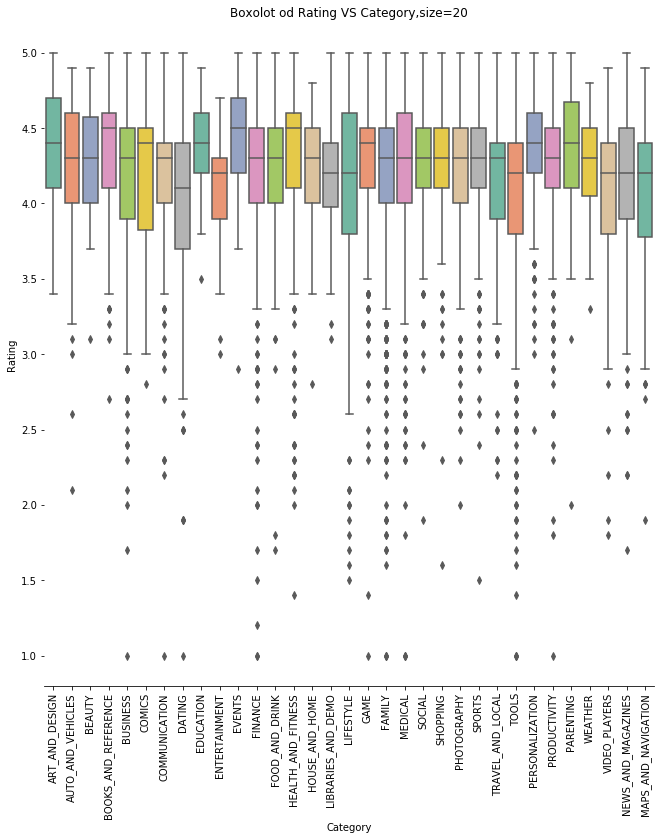

In [28]:
g=sns.catplot(x='Category',y='Rating',data=data,kind='box',height=10,
              palette='Set2')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels("Rating")
plt.title('Boxolot od Rating VS Category,size=20')


In [29]:
#Reviews
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [30]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [31]:
#convert to int
data['Reviews']=data['Reviews'].astype('int')
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

In [32]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
data1=data.groupby('Category')['Reviews'].mean()
data1=pd.DataFrame(data1)
data1.reset_index(drop=False)


,Category,Reviews
0,ART_AND_DESIGN,2.810356e+04
1,AUTO_AND_VEHICLES,1.594014e+04
2,BEAUTY,9.407929e+03
3,BOOKS_AND_REFERENCE,1.233633e+05
4,BUSINESS,4.605309e+04
5,COMICS,5.830940e+04
6,COMMUNICATION,2.486164e+06
7,DATING,3.738994e+04
8,EDUCATION,2.554517e+05
9,ENTERTAINMENT,3.971688e+05


In [38]:
data1=data[['Category', 'Reviews']].groupby(['Category'],as_index=False).mean()

In [39]:
data1.head()

,Category,Reviews
0,ART_AND_DESIGN,28103.557377
1,AUTO_AND_VEHICLES,15940.136986
2,BEAUTY,9407.928571
3,BOOKS_AND_REFERENCE,123363.258427
4,BUSINESS,46053.089109


D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Reveiw')

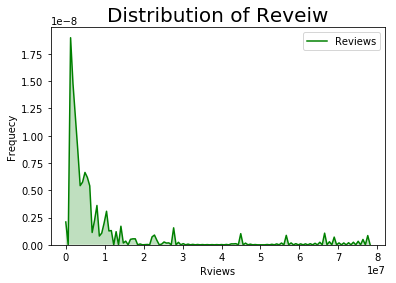

In [43]:

g=sns.kdeplot(data.Reviews,color='Green',shade=True)
g.set_xlabel("Rviews")
g.set_ylabel('Frequecy')
plt.title("Distribution of Reveiw",size=20)

In [44]:
data[data.Reviews>5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


In [45]:
#finding
#most of application in this store have less tahn 1M in Reviews.
#Obviously,well-known applications have a lot of reviews


D:\Users\lqs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

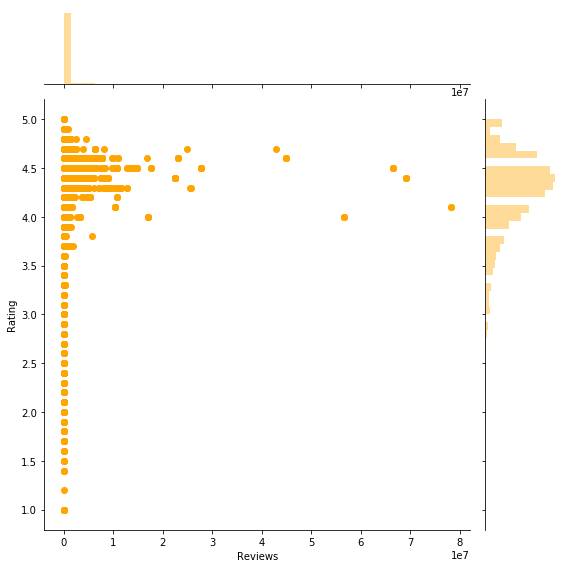

In [46]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x='Reviews',y='Rating',color='orange',data=data,size=8)

D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating VS Reviews')

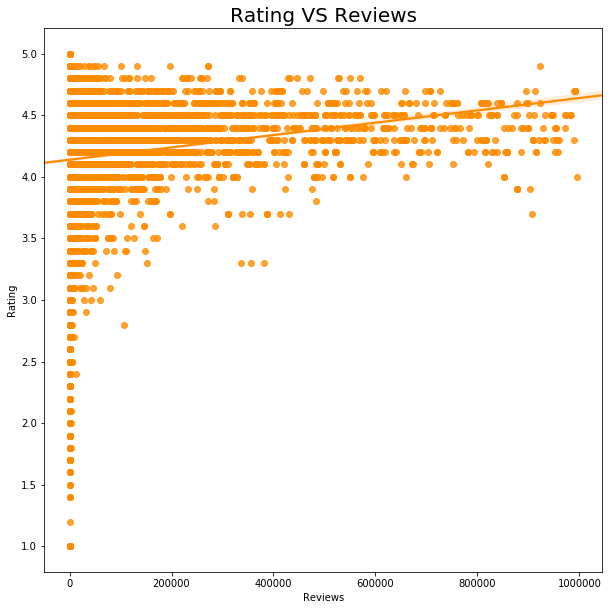

In [47]:
plt.figure(figsize=(10,10))
sns.regplot(x='Reviews',y='Rating',color='darkorange',
            data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reviews',size=20)







In [48]:
#Seeem like well-known application will get a good rating
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [49]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [50]:
#Data still in object type, and contain the metric symbol for the perefix,
#and special size which are "Varies with device" that we need to deal with it.

In [53]:

data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [54]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [55]:
#Note
#I decide to fill "Varies with device" with mean of size in each category


data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace=True)

D:\Users\lqs\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

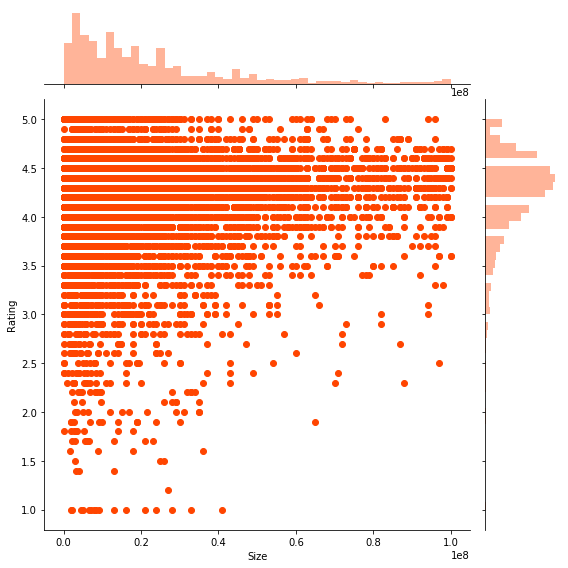

In [56]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8);

In [57]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [58]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [59]:
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.apply(lambda x: x.replace('+',''))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.apply(lambda x: int(x))


In [60]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [61]:
Sorted_values=sorted(list(data['Installs'].unique()))

In [62]:
data['Installs'].replace(Sorted_values,range(0,len(Sorted_values),1),inplace=True)



D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating VS Installs')

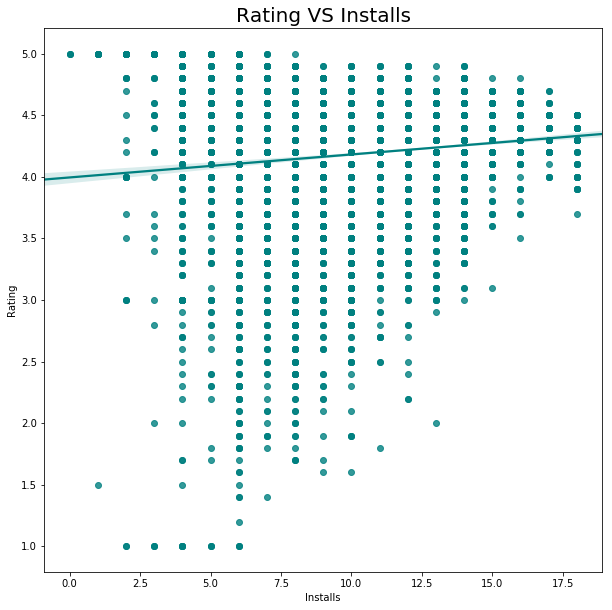

In [63]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

In [65]:
#Finding
#Seem like number of install affect to rating


In [66]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

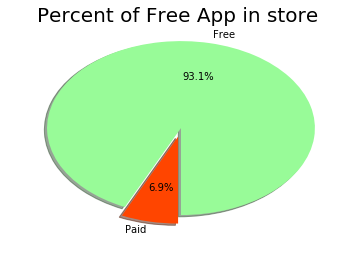

In [67]:
#Data to plot
labels=data['Type'].value_counts(sort=True).index
sizes=data['Type'].value_counts(sort=True)
colors=['palegreen','orangered']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=270,)
plt.title('Percent of Free App in store',size = 20)
plt.show()
        
        
        
        

In [68]:
#Most of applications in this store are free(93.1%)
#Because string can't enter to model, I need to change format a little bit

In [2]:
data['Free']=data['Type'].map(lambda s:1 if  s=='Free' else 0)
data.drop(['Type'],axis=1,inplace=True)
          

NameError: name 'data' is not defined

In [70]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [71]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [72]:
data['Price'].value_counts().head(30)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$24.99        5
$12.99        5
$11.99        5
$19.99        5
$8.99         4
$10.00        3
$5.49         3
$16.99        3
$1.00         2
$33.99        2
$9.00         2
$17.99        2
$7.49         2
Name: Price, dtype: int64

In [73]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [74]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [75]:
#Average of price is around 0.96, but most of them are free (8715 from 9360).
#The most expensive app is 400 dollar !!!.

D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Scatter plot Rating VS Price')

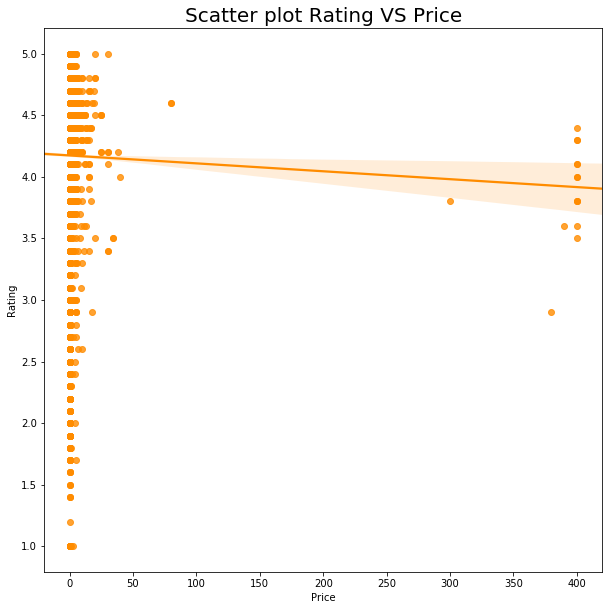

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

In [77]:
#Higher price application may make customer disappointed, if they are not good enough.


In [78]:
#Try to visualize in type of band, it may easier to understand

In [79]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 FXXXing expensive'

In [80]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], 
                                      as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 FXXXing expensive,3.923810


Text(0.5,1,'Boxen plot Rating VS PriceBand')

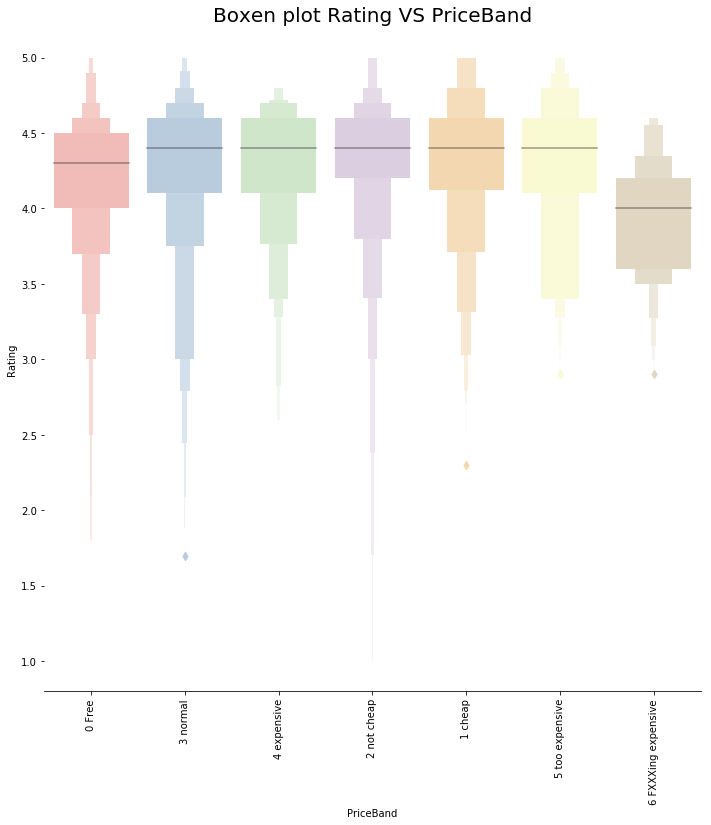

In [81]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

In [82]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [83]:
# Create palette for categories
flatui = []
for i in range(0,len(data['Category'].unique()),1):
    flatui.append(generate_color())

D:\Users\lqs\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'Category in each Priceband VS Rating')

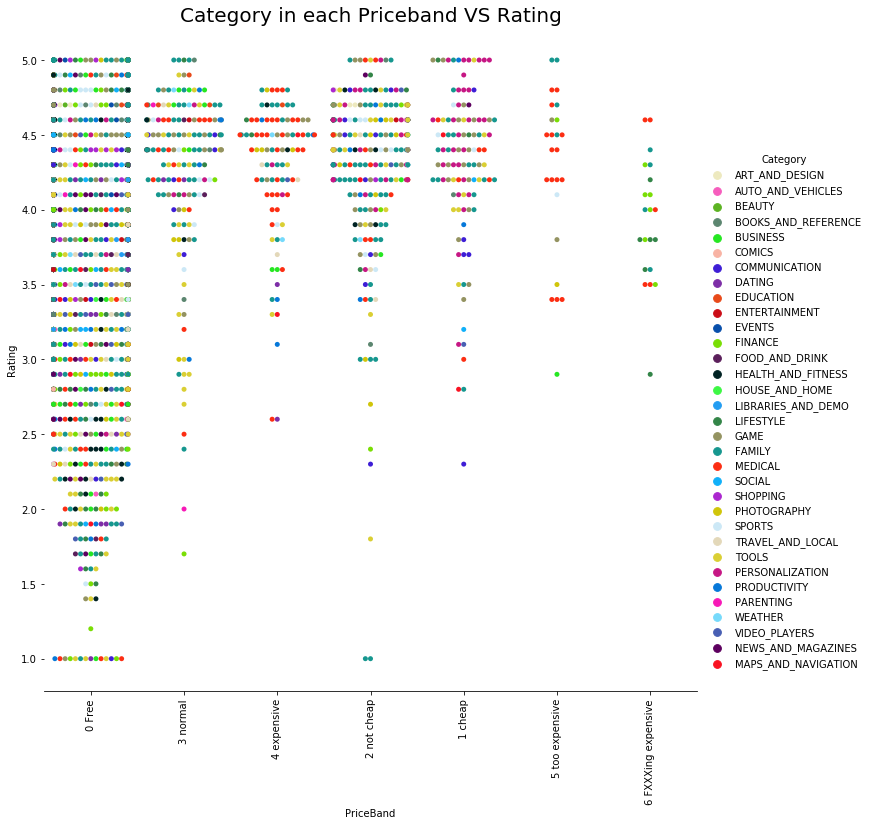

In [84]:
g = sns.catplot(x="PriceBand", y="Rating", hue="Category", kind="swarm", data=data,palette = flatui,size = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.title('Category in each Priceband VS Rating',size = 20)

In [85]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5,1,'Box plot Rating VS Content Rating')

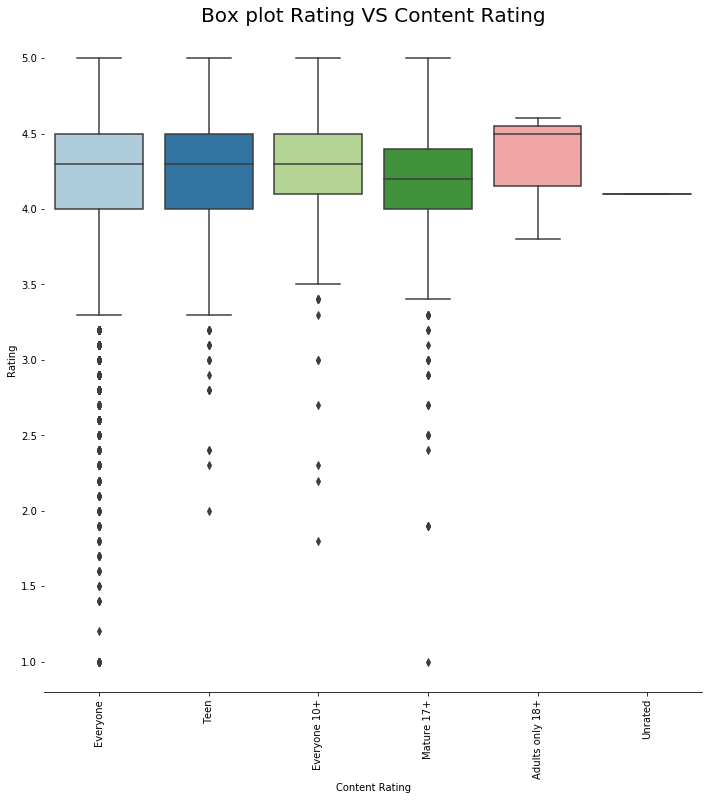

In [86]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In [87]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [88]:
data[data['Content Rating']!='Unrated']
data=pd.get_dummies(data,columns=['Content Rating'])

print(len(data['Genres'].unique()),'generes')
print('\n',data['Genres'].unique())

In [89]:
data.Genres.value_counts().head()

Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Name: Genres, dtype: int64

In [101]:
data.Genres.value_counts().tail(10)
data['Genres']=data['Genres'].str.split(';').str[0]

In [102]:
data['Genres'].str.split(';').str[0].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Genres, dtype: object

data['Genres'].str.split(';').str[0].tail()

In [103]:
data['Genres'].str.split(';').str[0].tail()

10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, dtype: object

In [97]:
print(len(data['Genres'].unique()),'genres')
print('\n',data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [98]:
data.Genres.value_counts().head()

Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Name: Genres, dtype: int64

In [104]:
data.Genres.value_counts().tail(10)

Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Trivia           28
Word             28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

In [105]:
data['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [106]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210663
std,0.104402
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [107]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [108]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


Text(0.5,1,'Boxenplot of Rating VS Genres')

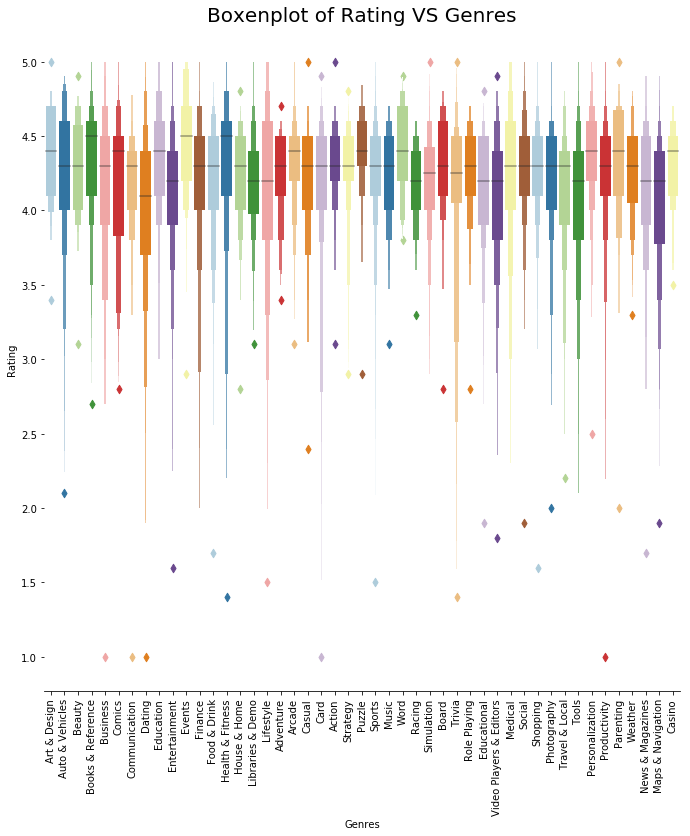

In [109]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

In [110]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [112]:
data['new']=pd.to_datetime(data['Last Updated'])
data['new'].describe()

count                    9360
unique                   1299
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [113]:
data['new'].max() 

Timestamp('2018-08-08 00:00:00')

In [116]:
data['new'][0] -  data['new'].max()

Timedelta('-213 days +00:00:00')

In [117]:
data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days
data['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Rating  VS Last Update( days ago )')

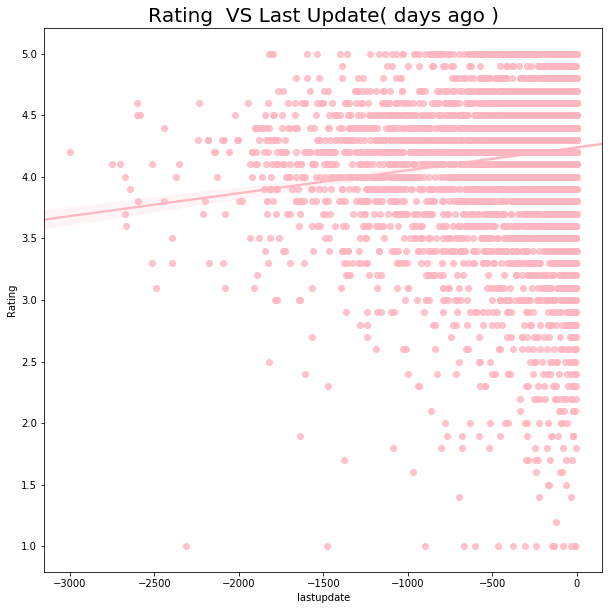

In [118]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightpink',data=data );
plt.title('Rating  VS Last Update( days ago )',size = 20)

In [119]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,...,0 Free,0,1,0,0,0,0,2018-01-07,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design,"January 15, 2018",2.0.0,...,0 Free,0,1,0,0,0,0,2018-01-15,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,...,0 Free,0,1,0,0,0,0,2018-08-01,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,...,0 Free,0,0,0,0,1,0,2018-06-08,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design,"June 20, 2018",1.1,...,0 Free,0,1,0,0,0,0,2018-06-20,2018-06-20,-49
